In [6]:
from IPython.display import Image
Image(url="../images/Title.png")

## Mechanics of Pairs Trading
Pairs trading is a market-neutral trading strategy that enables traders to potentially profit from both increases and decreases in market movements of two financial assets. 

Initially, traders identify pairs of assets with historically correlated prices, including equities, commodities, bonds, and other instruments influenced by similar market drivers. The trader then capitalizes on temporary deviations from the usual price relationship of these assets. 

For instance, profit potential arises when a trader pairs a long position (buy) with a short position (sell) as spreads deviate from historical average, adhering to the concept of mean reversion. Mean reversion is predicated on the assumption that the price of an asset will tend to converge to its average price over time.

## Objective of Pairs Trading
1. To profit from price movements
2. To diversify risk by spreading exposure across two instruments. 

## Use of Machine Learning
After identifying correlated assets, this study aims to use machine learning classification models to predict the price movements of the said assets, whether they converge (narrow spreads), diverge (widen spreads), or remain steady (minimal change). This will aid traders in formulating decisions on whether to buy or sell a particular pair of assets at a given point in time. For further study, regression models can be employed to forecast the future value of the spread between the two assets. 

## Quick Highlights
This study highights diversity as each model approaches the problem from different angles, capturing various aspects of the data's structure. After strong model performance, the study is applied in a real-world scenario where the model succesfully predicts market movements, demonstrating the practical utility of the model. 

<div class="alert alert-info">

### Data
    
</div>

The dataset consists of 33 market indices as columns, and 30 years of daily prices as rows,  
sourced from Kaggle: https://www.kaggle.com/code/asimislam/30-yrs-plots-of-market-data/input

In [4]:
from data_preprocessing import read_and_clean_data

df = read_and_clean_data('../data/30_yr_stock_market_data.csv')

# Display the cleaned data
df.head()

Initial Shape: (7754, 33)
NaN Percentage per Column:
Date                               0.000000
Dow Jones (^DJI)                   2.566417
Nasdaq (^IXIC)                     2.566417
S&P500 (^GSPC)                     2.566417
NYSE Composite (^NYA)              2.566417
Russell 2000 (^RUT)                2.566417
CBOE Volitility (^VIX)             2.566417
DAX Index (^GDAXI)                 1.934485
FTSE 100 (^FTSE)                   2.269796
Hang Seng Index (^HSI)             4.539592
Cocoa (CC=F)                      22.685066
Coffee (KC=F)                     22.723755
Corn (ZC=F)                       24.606655
Cotton (CT=F)                     22.697962
Live Cattle (LE=F)                29.739489
Orange Juice (OJ=F)               92.752128
Soybeans (ZS=F)                   24.709827
Sugar (SB=F)                      23.200929
Wheat (ZW=F)                      24.761413
Ethanol (EH=F)                    39.682744
Heating Oil (HO=F)                24.748517
Natural Gas (NG=F)     

,Date,Dow Jones (^DJI),Nasdaq (^IXIC),S&P500 (^GSPC),NYSE Composite (^NYA),Russell 2000 (^RUT),CBOE Volitility (^VIX),DAX Index (^GDAXI),FTSE 100 (^FTSE),Hang Seng Index (^HSI),...,Heating Oil (HO=F),Natural Gas (NG=F),Crude Oil-WTI (CL=F),Copper (HG=F),Gold (GC=F),Silver (SI=F),Treasury Yield 5 Years (^FVX),Treasury Bill 13 Week (^IRX),Treasury Yield 10 Years (^TNX),Treasury Yield 30 Years (^TYX)
2605,2003-12-30,10425.04004,2009.880005,1109.640015,6443.600098,565.469971,17.68,3965.159912,4470.399902,12526.74023,...,0.9294,6.600,32.790001,1.0400,416.899994,5.983,3.251,0.912,4.279,5.088
2608,2004-01-05,10544.07031,2047.359985,1122.219971,6534.580078,568.919983,17.49,4035.899902,4513.299805,13005.33008,...,0.9684,6.827,33.779999,1.0830,424.399994,6.233,3.359,0.902,4.387,5.175
2609,2004-01-06,10538.66016,2057.370117,1123.670044,6541.149902,569.890015,16.73,4035.439941,4505.200195,13036.32031,...,0.9774,7.082,33.700001,1.0670,422.799988,6.316,3.240,0.901,4.277,5.106
2610,2004-01-07,10529.03027,2077.679932,1126.329956,6525.299805,574.619995,15.50,4004.399902,4473.000000,13157.67969,...,0.9661,6.878,33.619999,1.0625,421.899994,6.251,3.210,0.886,4.246,5.084
2611,2004-01-08,10592.44043,2100.250000,1131.920044,6569.319824,579.619995,15.61,4045.429932,4494.200195,13203.58984,...,0.9841,7.094,33.980000,1.1045,424.000000,6.261,3.247,0.847,4.249,5.080


In [5]:
# Describe only numeric columns.
description = df.select_dtypes(include=[np.number]).describe()
display(description)

,Dow Jones (^DJI),Nasdaq (^IXIC),S&P500 (^GSPC),NYSE Composite (^NYA),Russell 2000 (^RUT),CBOE Volitility (^VIX),DAX Index (^GDAXI),FTSE 100 (^FTSE),Hang Seng Index (^HSI),Cocoa (CC=F),...,Heating Oil (HO=F),Natural Gas (NG=F),Crude Oil-WTI (CL=F),Copper (HG=F),Gold (GC=F),Silver (SI=F),Treasury Yield 5 Years (^FVX),Treasury Bill 13 Week (^IRX),Treasury Yield 10 Years (^TNX),Treasury Yield 30 Years (^TYX)
count,4676.000000,4676.000000,4676.000000,4676.000000,4676.000000,4676.000000,4676.000000,4676.000000,4676.000000,4676.000000,...,4676.000000,4676.000000,4676.000000,4676.000000,4676.000000,4676.000000,4676.000000,4676.000000,4676.000000,4676.000000
mean,18386.806392,5462.282402,2126.880857,10353.522530,1134.292624,19.204683,9252.874592,6257.537908,21797.621113,2430.931138,...,2.170069,4.530363,70.094671,3.012245,1235.089114,18.488627,2.319159,1.384004,2.899854,3.518833
std,8321.622463,3939.021209,1075.177313,3059.930781,495.440687,8.853720,3585.077284,968.960858,4608.272595,563.676939,...,0.730864,2.342880,22.405159,0.827827,451.541557,7.283451,1.295877,1.692604,1.127171,1.014694
min,6547.049805,1268.640015,676.530029,4226.310059,343.260010,9.140000,3646.989990,3512.100098,10967.650390,1312.000000,...,0.610400,1.495000,-37.630001,1.040000,374.799988,5.514000,0.195000,-0.105000,0.499000,0.937000
25%,11319.889892,2344.949951,1265.319977,7845.697510,713.367508,13.420000,6131.997559,5635.674805,19182.995115,2081.000000,...,1.635900,2.795000,52.117499,2.552125,919.574982,14.191000,1.370000,0.068000,2.000000,2.832750
50%,15877.665040,4032.344971,1793.500000,10003.514650,1072.609985,16.680000,9035.575195,6323.650147,22107.074220,2450.000000,...,2.007450,3.814500,68.014999,3.085250,1266.300049,17.216001,1.944000,0.339000,2.749000,3.364500
75%,25241.542483,7592.109863,2784.944946,12580.647708,1522.700012,22.262500,12342.767580,7089.650025,24711.467285,2867.000000,...,2.855425,5.882500,87.862501,3.592125,1615.049988,22.756750,3.340250,2.285750,3.837250,4.474000
max,36799.648440,16057.440430,4793.540039,17353.759770,2442.739990,82.690002,16469.750000,8012.500000,33154.121090,4370.000000,...,5.135400,15.378000,145.289993,4.929000,2067.899902,47.520000,5.227000,5.348000,5.248000,5.558000


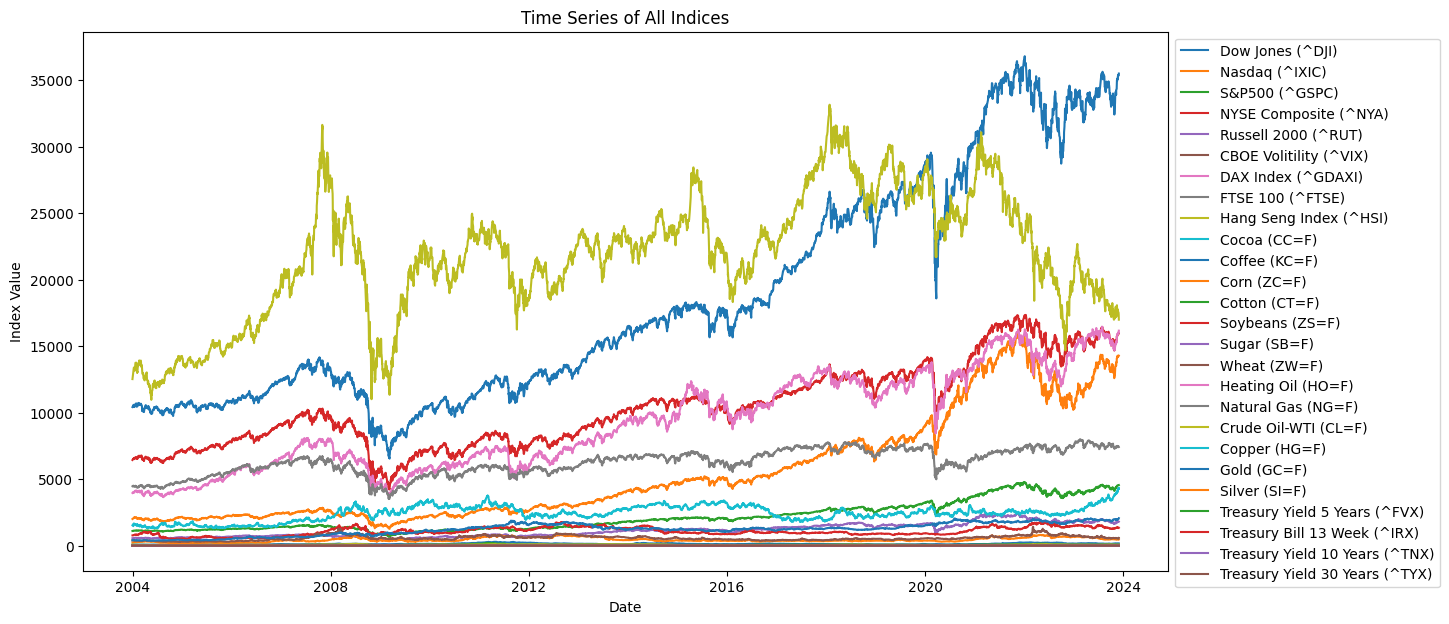

In [6]:
# Plot time series for all indices
df.set_index('Date', inplace=True)
plt.figure(figsize=(14, 7))
for column in df.columns:
    plt.plot(df.index, df[column], label=column)

plt.title('Time Series of All Indices')
plt.xlabel('Date')
plt.ylabel('Index Value')
plt.legend(loc='upper left', bbox_to_anchor=(1,1))
plt.savefig('Indices-Time.png', bbox_inches='tight')
plt.show()

<div class="alert alert-info">

### Pairs Selection

</div>

After reviewing the historical prices, we proceed to identify pairs of assets that exhibit strong correlations. Initial observations reveal significant correlations within similar asset classes, such as between equity (upper left quadrant) and bond indices (lower right quadrant). Notably, a remarkable positive correlation between natural gas and bonds and natural gas and equities has been identified.

Consequently, for this analysis, we select natural gas and the Treasury Yield 10 Years, which demonstrate a correlation of approximately 0.70, to explore the dynamics between natural gas and representative bond indices.

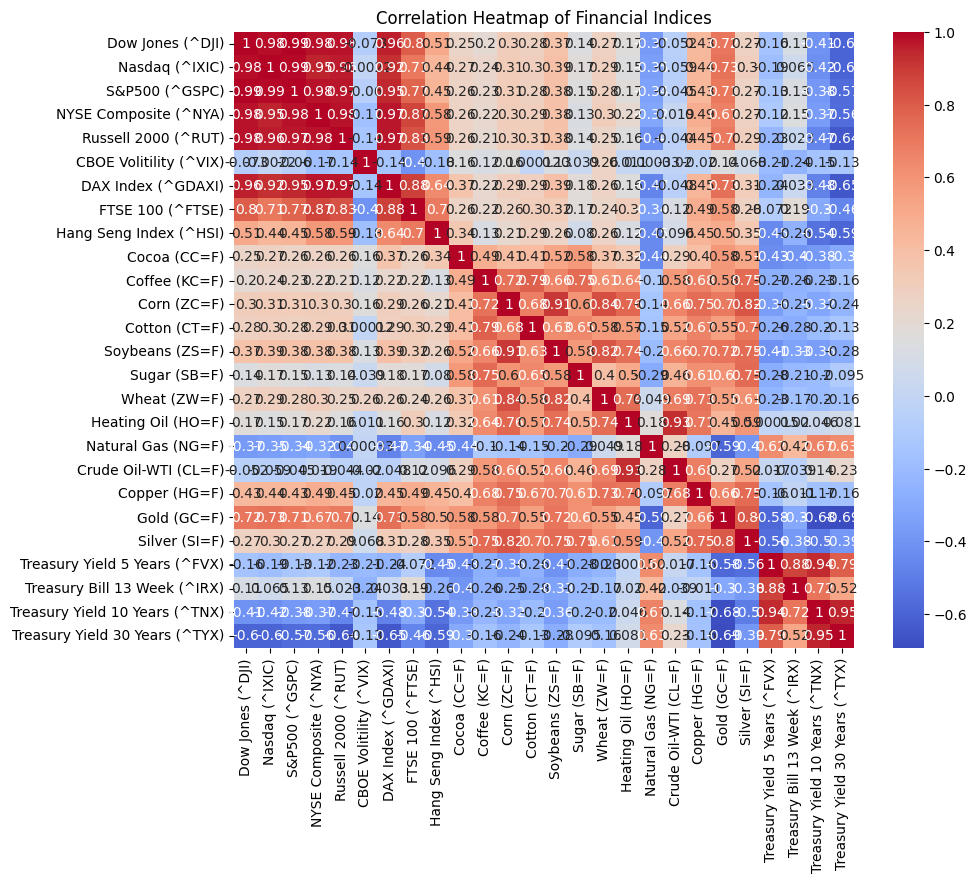

In [7]:
# Create a correlation heatmap
plt.figure(figsize=(10, 8))
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap of Financial Indices')
plt.savefig('Indices-Corr.png', bbox_inches='tight')
plt.show()

In the process of creating a predictive model, first, eliminate redundant independent variables to address the issue of multicollinearity, which was observed among certain financial indices as mentioned. Multicollinearity arises when two or more independent variables in a regression model are highly correlated, leading to inflated standard errors and unreliable coefficient estimates that complicate the interpretation of the model's outputs.  

After a thorough analysis, we decided to remove the Dow Jones Industrial Average (DJIA),  NYSE Composite (NYA), Russell 2000 (^RUT), 13-week, 5Yr and 30Y Treasury Yields from our model. These indices exhibited a high degree of correlation with the S&P 500 (GSPC) and 10Y YS Treasury Yield, which we retained due to its comprehensive market representation.  

<div class="alert alert-info">

### More Data Preprocessing
    
</div>

To ensure uniformity across the indices, I employed the StandardScaler() function for normalization. This choice is strategic because the StandardScaler does not confine values within a predetermined range. This is particularly beneficial when dealing with index prices, as it preserves the natural variability and distribution of the data. By standardizing the data, we transform the prices to have a mean of zero and a standard deviation of one, facilitating a more meaningful comparison across different financial instruments without distorting their inherent price dynamics.

Generate the spreads between an index and the Treasury Yield 10 Years.  
Calculate mean spreads per year.  
calculate the difference between the spread and the yearly average.  

Labels as follows:  
> divergence if the spread widened by more than 0.05  
> steady if the spread did not move within a +/- 0.05 allowance  
> convergence if the spread narrowed by more than -0.05

In [9]:
from feature_engineering import create_spreads_and_more

spread_data, df_labels = create_spreads_and_more(df)

(4676, 18)

,Spread_CBOE Volitility (^VIX)_TNX,Spread_Cocoa (CC=F)_TNX,Spread_Coffee (KC=F)_TNX,Spread_Copper (HG=F)_TNX,Spread_Corn (ZC=F)_TNX,Spread_Cotton (CT=F)_TNX,Spread_Crude Oil-WTI (CL=F)_TNX,Spread_DAX Index (^GDAXI)_TNX,Spread_FTSE 100 (^FTSE)_TNX,Spread_Gold (GC=F)_TNX,Spread_Hang Seng Index (^HSI)_TNX,Spread_Heating Oil (HO=F)_TNX,Spread_Natural Gas (NG=F)_TNX,Spread_S&P500 (^GSPC)_TNX,Spread_Silver (SI=F)_TNX,Spread_Soybeans (ZS=F)_TNX,Spread_Sugar (SB=F)_TNX,Spread_Wheat (ZW=F)_TNX
Date,,,,,,,,,,,,,,,,,,
2003-12-30,steady,steady,steady,steady,steady,steady,steady,steady,steady,steady,steady,steady,steady,steady,steady,steady,steady,steady
2004-01-05,divergence,convergence,convergence,convergence,convergence,divergence,convergence,convergence,convergence,steady,steady,convergence,divergence,convergence,convergence,steady,convergence,divergence
2004-01-06,divergence,steady,convergence,convergence,steady,divergence,convergence,steady,steady,steady,steady,convergence,divergence,steady,steady,divergence,convergence,divergence
2004-01-07,steady,divergence,convergence,convergence,steady,divergence,convergence,steady,steady,steady,steady,convergence,divergence,steady,steady,divergence,convergence,divergence
2004-01-08,steady,divergence,convergence,convergence,steady,divergence,convergence,steady,steady,steady,steady,convergence,divergence,steady,steady,divergence,convergence,divergence


Labels are further mapped as follows:  
> 1 if divergence  
> 0 if steady  
> -1 if convergence

In [10]:
# Drop the first row
df_labels_mapped = df_labels.iloc[1:]

# Apply the mapping to convert labels from text to numbers
mapping = {'divergence': 1, 'convergence': -1, 'steady': 0}
df_labels_mapped = df_labels.applymap(lambda x: mapping.get(x, x))

display(df_labels_mapped.shape)
display(df_labels_mapped.head())

(4676, 18)

,Spread_CBOE Volitility (^VIX)_TNX,Spread_Cocoa (CC=F)_TNX,Spread_Coffee (KC=F)_TNX,Spread_Copper (HG=F)_TNX,Spread_Corn (ZC=F)_TNX,Spread_Cotton (CT=F)_TNX,Spread_Crude Oil-WTI (CL=F)_TNX,Spread_DAX Index (^GDAXI)_TNX,Spread_FTSE 100 (^FTSE)_TNX,Spread_Gold (GC=F)_TNX,Spread_Hang Seng Index (^HSI)_TNX,Spread_Heating Oil (HO=F)_TNX,Spread_Natural Gas (NG=F)_TNX,Spread_S&P500 (^GSPC)_TNX,Spread_Silver (SI=F)_TNX,Spread_Soybeans (ZS=F)_TNX,Spread_Sugar (SB=F)_TNX,Spread_Wheat (ZW=F)_TNX
Date,,,,,,,,,,,,,,,,,,
2003-12-30,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2004-01-05,1,-1,-1,-1,-1,1,-1,-1,-1,0,0,-1,1,-1,-1,0,-1,1
2004-01-06,1,0,-1,-1,0,1,-1,0,0,0,0,-1,1,0,0,1,-1,1
2004-01-07,0,1,-1,-1,0,1,-1,0,0,0,0,-1,1,0,0,1,-1,1
2004-01-08,0,1,-1,-1,0,1,-1,0,0,0,0,-1,1,0,0,1,-1,1


Here are quick summary statistics of the dataset. An almost even split between converged and diverged prices and only about 12% exhibited steady price movements.

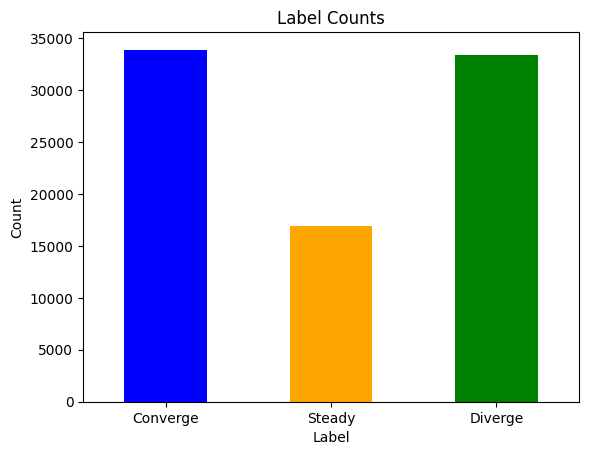

In [11]:
# Count the occurrences of each label (-1, 0, 1)
label_counts = df_labels_mapped.apply(pd.value_counts).fillna(0).astype(int).sum(axis=1)

# Plot the histogram
label_counts.plot(kind='bar', color=['blue', 'orange', 'green'])
plt.title('Label Counts')
plt.xlabel('Label')
plt.ylabel('Count')
plt.xticks(ticks=[0, 1, 2], labels=['Converge', 'Steady', 'Diverge'], rotation=0)
plt.show()

In [12]:
df_features = df_labels_mapped.drop(df_labels_mapped.columns[13], axis=1) 

<div class="alert alert-info">

### Data Segregation
    
</div>

With the market prices of various indices at our disposal, our objective is to delineate the spread between natural gas and the US 10-Year yield.

In [13]:
# Define X to include all columns except 'Spread_Natural Gas (NG=F)_TNX'
X = df_features.drop('Spread_Natural Gas (NG=F)_TNX', axis=1)

# Define y to be the column 'Spread_Natural Gas (NG=F)_TNX'
y = df_labels_mapped['Spread_Natural Gas (NG=F)_TNX']

Features:

In [14]:
display(X.shape)
display(X.head())

(4676, 16)

,Spread_CBOE Volitility (^VIX)_TNX,Spread_Cocoa (CC=F)_TNX,Spread_Coffee (KC=F)_TNX,Spread_Copper (HG=F)_TNX,Spread_Corn (ZC=F)_TNX,Spread_Cotton (CT=F)_TNX,Spread_Crude Oil-WTI (CL=F)_TNX,Spread_DAX Index (^GDAXI)_TNX,Spread_FTSE 100 (^FTSE)_TNX,Spread_Gold (GC=F)_TNX,Spread_Hang Seng Index (^HSI)_TNX,Spread_Heating Oil (HO=F)_TNX,Spread_Silver (SI=F)_TNX,Spread_Soybeans (ZS=F)_TNX,Spread_Sugar (SB=F)_TNX,Spread_Wheat (ZW=F)_TNX
Date,,,,,,,,,,,,,,,,
2003-12-30,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2004-01-05,1,-1,-1,-1,-1,1,-1,-1,-1,0,0,-1,-1,0,-1,1
2004-01-06,1,0,-1,-1,0,1,-1,0,0,0,0,-1,0,1,-1,1
2004-01-07,0,1,-1,-1,0,1,-1,0,0,0,0,-1,0,1,-1,1
2004-01-08,0,1,-1,-1,0,1,-1,0,0,0,0,-1,0,1,-1,1


Target:

In [15]:
y

Date
2003-12-30    0
2004-01-05    1
2004-01-06    1
2004-01-07    1
2004-01-08    1
             ..
2023-11-22   -1
2023-11-24   -1
2023-11-27   -1
2023-11-28   -1
2023-11-29   -1
Name: Spread_Natural Gas (NG=F)_TNX, Length: 4676, dtype: int64

An 80%-20 train-test set split is employed.

In [16]:
from sklearn.model_selection import train_test_split
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

<div class="alert alert-info">

### Model Training
    
</div>

Four models are chosen for their varying approaches to prediction, offering a broad spectrum of insights into the dataset. Each model undergoes a series of trials (N=3) to fine-tune its hyperparameters for optimal performance. Following is an overview of models used including the hyperparameters tested:  

1. k-Nearest Neighbors (kNN)  
- intuitive and straightforward  
- n_neighbors range (2,6)  
2. Logistic Regression  
- excels in binary classification problems  
- regularization strength C from 1e^-4 to 1e^4  
- and regularization type l1 or l2 to mitigate overfitting and improve generalization  
3. Random Forest
- powerful ensemble technique known for its ability to handle non-linear data, reducing the risk of overfitting
- max_depth range [2,3,4,5] to control depth of trees
4. Gradient Boosting Method
- renowned for its predictive accuracy by sequentially correcting errors of weak classifiers through strong ones
- max_depth range [2,3,4,5] to control depth of trees

Each function systematically explores a range of hyperparameters to identify the configuration that yields the best balance between training accuracy and test performance, thus ensuring the model's ability to generalize well to unseen data. The following graph illustrates which features significantly impact the model.   
Top-Bottom: Logistic, Random Forest, Gradient Boosting Method

['kNN Regressor', np.float64(0.3757640260703761), np.float64(0.44329760832850007), 'n_neighbors = 6', 'N/A', 0.19141507148742676]
N/A seconds
['Logistic (l1)', np.float64(0.685650623885918), np.float64(0.683048433048433), 'C = 1.0', 'Spread_Heating Oil (HO=F)_TNX', 0.35099220275878906]
Spread_Heating Oil (HO=F)_TNX seconds
['Random Forest', np.float64(0.7475935828877006), np.float64(0.7129629629629629), 'Max_depth = 5', 'Spread_DAX Index (^GDAXI)_TNX', 1.4301350116729736]
Spread_DAX Index (^GDAXI)_TNX seconds
['Gradient Boosting Method', np.float64(0.9163992869875224), np.float64(0.8244301994301995), 'Max_depth = 5', 'Spread_Gold (GC=F)_TNX', 8.602179050445557]
Spread_Gold (GC=F)_TNX seconds


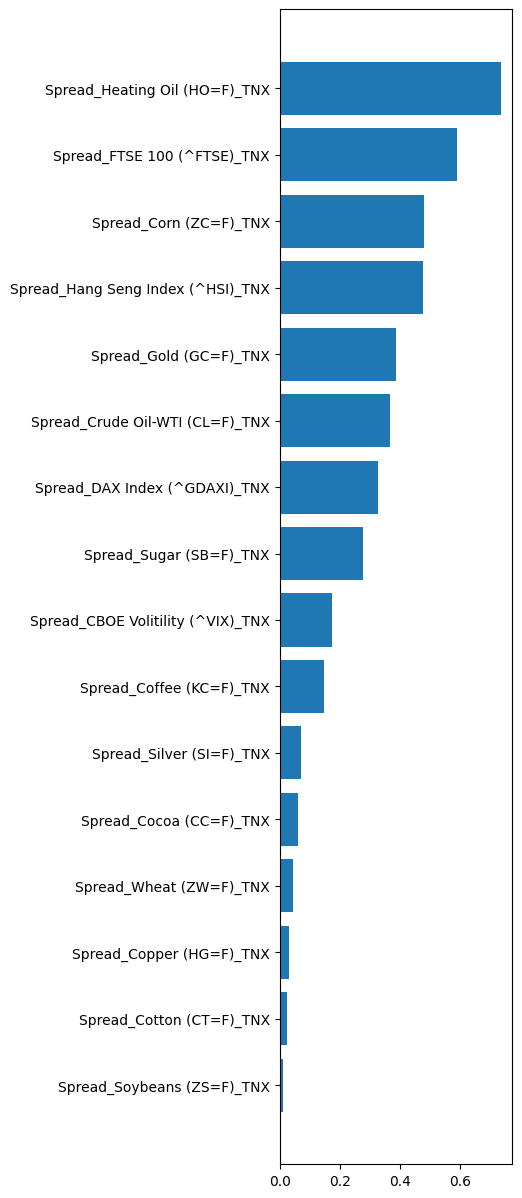

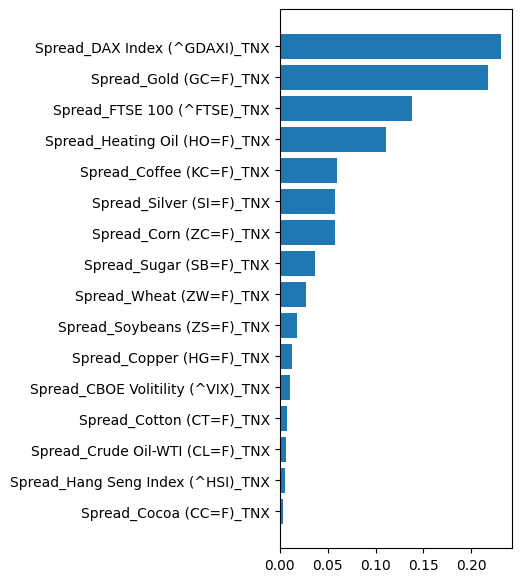

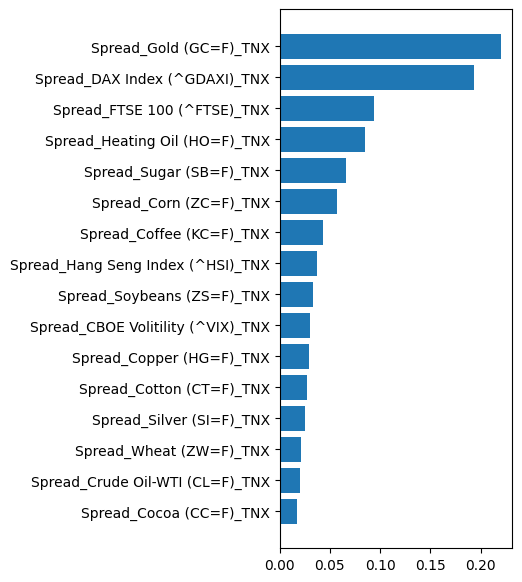

In [17]:
from model_training import train_kNN, train_logistic, train_RF, train_GBM

X = df_features.drop('Spread_Natural Gas (NG=F)_TNX', axis=1)
y = df_labels_mapped['Spread_Natural Gas (NG=F)_TNX']

# Train models and display results
start_time = time.time()
a = train_kNN(X, y)
print(a)
print("%s seconds" % a[4])

start_time = time.time()
b = train_logistic(X, y, reg='l1')
print(b)
print("%s seconds" % b[4])

start_time = time.time()
c = train_RF(X, y)
print(c)
print("%s seconds" % c[4])

start_time = time.time()
d = train_GBM(X, y)
print(d)
print("%s seconds" % d[4])

<div class="alert alert-info">

### Model Results and Discussion
    
</div>

The comparison of machine learning models provided shows the following:

1. **kNN Regressor**: Exhibited the lowest performance in terms of accuracy, both on training and test data. The run time was quick, but not the quickest.

2. **Logistic Regression (L1)**: Offered a good balance between training and test accuracy, suggesting it generalizes well. It had the shortest run time, making it the fastest model in this lineup.

3. **Random Forest**: Performed better than logistic regression in accuracy but took longer to run. However, it was much quicker than Gradient Boosting while still providing insight into feature importance.

4. **Gradient Boosting Method**: Achieved the highest training accuracy and a strong test accuracy, indicating it's the most effective model at learning from the training data and generalizing to new data. However, it also had the longest run time.

A comprehensive grid search of various hyperparameters highlighted the **Gradient Boosting Classifier** as the standout performer if the primary concern is prediction accuracy. Despite having the longest runtime at 14 seconds, it boasts the highest training accuracy, signifying a robust capacity to learn from the training dataset. It's important to note, however, that while the test accuracy remains superior compared to other models, it hints at the possibility of overfitting. Nonetheless, the model exhibits significant predictive prowess.

In [18]:
cols = ['Machine Learning Method', 'Train Accuracy','Test Accuracy', 'Best Parameter', 'Top Predictor Variable', 'Run Time']
df2 = pd.DataFrame(columns=cols)

df2.loc[0] = a
df2.loc[1] = b
df2.loc[2] = c
df2.loc[3] = d

df2

,Machine Learning Method,Train Accuracy,Test Accuracy,Best Parameter,Top Predictor Variable,Run Time
0,kNN Regressor,0.375764,0.443298,n_neighbors = 6,N/A,0.191415
1,Logistic (l1),0.685651,0.683048,C = 1.0,Spread_Heating Oil (HO=F)_TNX,0.350992
2,Random Forest,0.747594,0.712963,Max_depth = 5,Spread_DAX Index (^GDAXI)_TNX,1.430135
3,Gradient Boosting Method,0.916399,0.824430,Max_depth = 5,Spread_Gold (GC=F)_TNX,8.602179


<div class="alert alert-info">

## Model Evaluation
    
</div>

Examining the performance metrics further reveals that the Gradient Boost model achieves unparalleled precision and recall across all classes compared to its counterparts, demonstrating a commendable balance in minimizing false positives and negatives. Its overall accuracy is remarkable, standing at an impressive 84%.

In [19]:
# Define a function to train a model, predict and return classification report as a string
def train_and_evaluate_model(model, model_name, X_train, y_train, X_test, y_test):
    model.fit(X_train, y_train)
    pred = model.predict(X_test)
    report = classification_report(y_test, pred, output_dict=True)
    return pd.DataFrame(report).transpose()

# Set up the models with their respective parameters
models = {
    "Gradient Boosting Classifier": GradientBoostingClassifier(n_estimators=100, max_depth=5),
    "Random Forest Classifier": RandomForestClassifier(n_estimators=100, max_depth=5),
    "Logistic Regression": LogisticRegression(C=1.0),
}

# Initialize an empty DataFrame to store classification reports
reports_df = pd.DataFrame()

# Assuming X_train, X_test, y_train, y_test are already defined
for model_name, model in models.items():
    report = train_and_evaluate_model(model, model_name, X_train_val, y_train_val, X_test, y_test)
    report['Model'] = model_name  # Add model name as a column
    reports_df = pd.concat([reports_df, report])

# Reset index to make Model a column
reports_df.reset_index(inplace=True)

# Rename 'index' column to 'Class'
reports_df.rename(columns={'index': 'Class'}, inplace=True)

# Set 'Model' and 'Class' as the multi-index
reports_df.set_index(['Model', 'Class'], inplace=True)

display(reports_df.round(4))

precision  recall  f1-score  \
Model                        Class                                       
Gradient Boosting Classifier -1               0.8781  0.9241    0.9005   
                             0                0.7394  0.6010    0.6630   
                             1                0.8537  0.8974    0.8750   
                             accuracy         0.8440  0.8440    0.8440   
                             macro avg        0.8237  0.8075    0.8129   
                             weighted avg     0.8389  0.8440    0.8394   
Random Forest Classifier     -1               0.7522  0.8822    0.8120   
                             0                0.6957  0.2365    0.3529   
                             1                0.7351  0.8775    0.8000   
                             accuracy         0.7404  0.7404    0.7404   
                             macro avg        0.7277  0.6654    0.6550   
                             weighted avg     0.7335  0.7404    0.7080   
Logistic Regression          -1               0.7259  0.8665    0.7900   
                             0                0.5192  0.1330    0.2118   
                             1                0.6822  0.8319    0.7497   
                             accuracy         0.6944  0.6944    0.6944   
                             macro avg        0.6425  0.6105    0.5838   
                             weighted avg     0.6647  0.6944    0.6495   

                                            support  
Model                        Class                   
Gradient Boosting Classifier -1            382.0000  
                             0             203.0000  
                             1             351.0000  
                             accuracy        0.8440  
                             macro avg     936.0000  
                             weighted avg  936.0000  
Random Forest Classifier     -1            382.0000  
                             0             203.0000  
                             1             351.0000  
                             accuracy        0.7404  
                             macro avg     936.0000  
                             weighted avg  936.0000  
Logistic Regression          -1            382.0000  
                             0             203.0000  
                             1             351.0000  
                             accuracy        0.6944  
                             macro avg     936.0000  
                             weighted avg  936.0000

The Proportion Chance Criterion (PCC) is also looked at. It is a statistical measure used to evaluate the performance of a model against random chance. 

The general accuracy figures as seen above surpasses 1.25 times the PCC, which confirms that the model is providing predictions with a reliability that is not just due to random chance, thus affirming the effectiveness of the machine learning approach in this scenario.

Population per class:       0
 0   991
 1  1808
-1  1877
Proportion Chance Criterion: 35.55%
1.25 * Proportion Chance Criterion: 44.44%


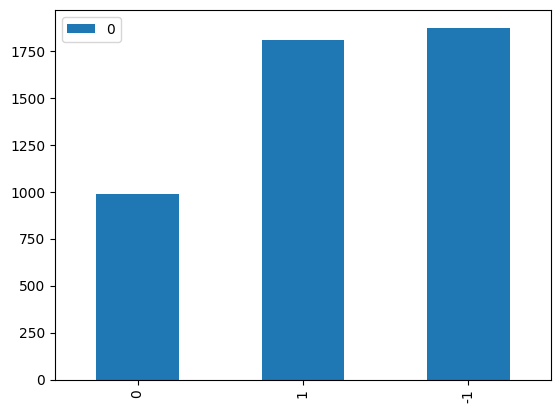

In [20]:
from collections import Counter
state_counts = Counter(y)
df_target = pd.DataFrame.from_dict(state_counts, orient='index')
df_target.plot(kind='bar')

num=(df_target[0]/df_target[0].sum())**2

print("Population per class:{}".format(df_target))

print("Proportion Chance Criterion: {:0.2f}%".format(100*num.sum()))
print("1.25 * Proportion Chance Criterion: {:0.2f}%".format(1.25*100*num.sum()))

For additional insight, the chart below shows gold as the top predictor in forecasting future spreads, which suggests that gold's price movements are highly indicative of the market dynamics relevant to the study. Gold is often seen as a 'safe haven' asset and may have strong predictive relationships with other financial instruments during periods of market volatility or uncertainty. Its importance in the model could imply that changes in gold prices are a strong signal of wider market shifts that could affect the spread between natural gas and US 10-Year yields.

Weight of the top predictor = 0.197642
Top Predictor = Spread_DAX Index (^GDAXI)_TNX


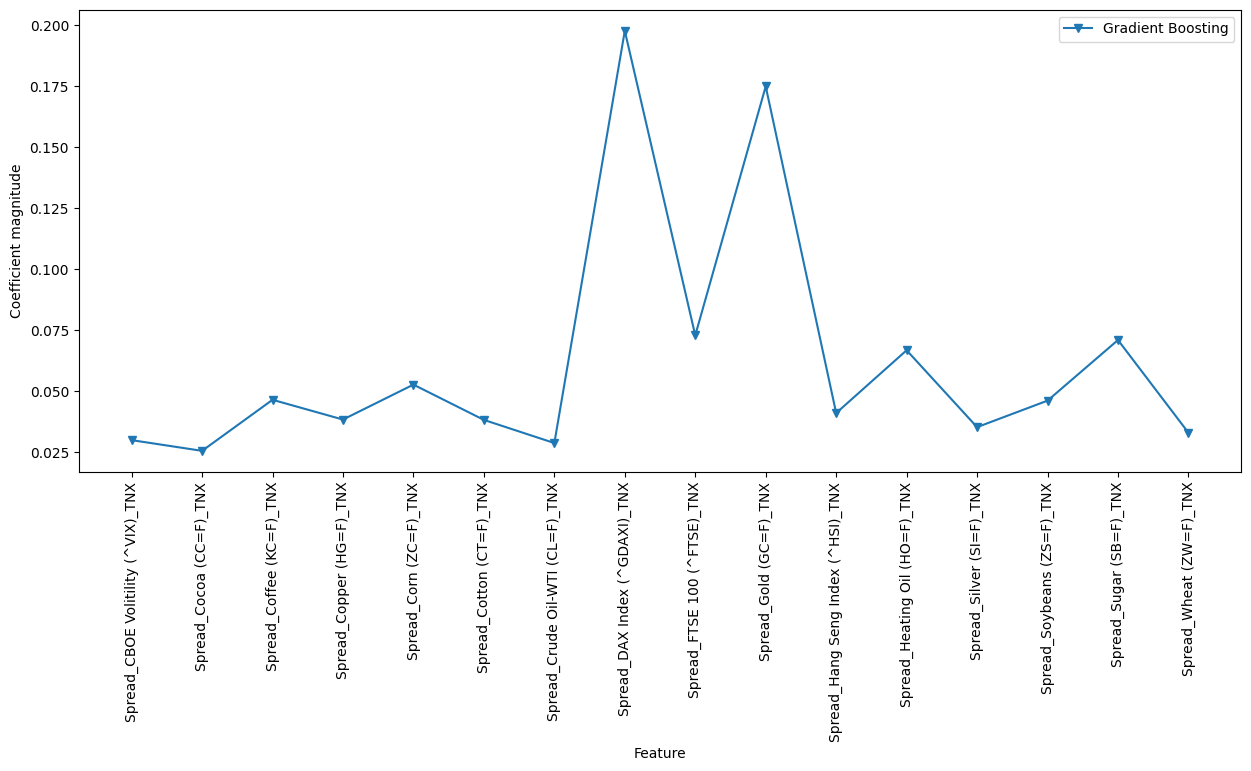

In [21]:
# Get all columns except 'Spread_Natural Gas (NG=F)_TNX'
feature_cols = df_features.drop('Spread_Natural Gas (NG=F)_TNX', axis=1).columns  

# Generate feature importance
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=3)

# Train the Gradient Boosting model
svc = GradientBoostingClassifier(n_estimators=100, max_depth=5).fit(X_train, y_train)
coefs = svc.feature_importances_

# Plot feature importance
fig = plt.figure(figsize=(15, 6))
plt.plot(coefs.T, '-v', label="Gradient Boosting")
plt.xticks(range(len(feature_cols)), feature_cols, rotation=90)
plt.xlabel("Feature")
plt.ylabel("Coefficient magnitude")
plt.legend()

# Print top predictor info
print("Weight of the top predictor = %f" % np.amax(np.abs(coefs.T)))
print("Top Predictor = %s" % feature_cols[np.argmax(np.abs(coefs.T))])

<div class="alert alert-info">

## Conclusion 
    
</div>

Advancing to practical application, we utilized the most current dataset to forecast the subsequent spread, employing the Gradient Boost model. The prediction indicated a convergence in the next spread.

The following snip illustrates the predicted spread level for November 30th, which has indeed shown a slight convergence, affirming our model’s capability to accurately forecast market movements.

In [22]:
X_sorted = X.sort_values(by='Date')
display(X_sorted.tail(1))

,Spread_CBOE Volitility (^VIX)_TNX,Spread_Cocoa (CC=F)_TNX,Spread_Coffee (KC=F)_TNX,Spread_Copper (HG=F)_TNX,Spread_Corn (ZC=F)_TNX,Spread_Cotton (CT=F)_TNX,Spread_Crude Oil-WTI (CL=F)_TNX,Spread_DAX Index (^GDAXI)_TNX,Spread_FTSE 100 (^FTSE)_TNX,Spread_Gold (GC=F)_TNX,Spread_Hang Seng Index (^HSI)_TNX,Spread_Heating Oil (HO=F)_TNX,Spread_Silver (SI=F)_TNX,Spread_Soybeans (ZS=F)_TNX,Spread_Sugar (SB=F)_TNX,Spread_Wheat (ZW=F)_TNX
Date,,,,,,,,,,,,,,,,
2023-11-29,-1,1,-1,-1,-1,-1,-1,-1,-1,0,-1,-1,0,-1,1,-1


In [23]:
# Split into training and test set (if not already split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=3)

# Fit the model
svc = GradientBoostingClassifier(n_estimators=100, max_depth=5).fit(X_train, y_train)

# Use the last known feature values as input for November 30 prediction
nov_30_features = X.iloc[-1].values.reshape(1, -1)

# Predict the spread for November 30
predicted_spread = svc.predict(nov_30_features)

# Output the prediction
predicted_spread_label = predicted_spread[0]
spread_label_mapping = {0: 'steady', 1: 'divergence', -1: 'convergence'}
nov_30_prediction = spread_label_mapping.get(predicted_spread_label, 'Unknown')

print(f"The predicted spread label for 'Spread_Natural Gas (NG=F)_TNX' on November 30, 2023, is: {nov_30_prediction}")

The predicted spread label for 'Spread_Natural Gas (NG=F)_TNX' on November 30, 2023, is: convergence


In [24]:
from IPython.display import Image
Image(url="../images/Snip.png")